# Data Management

## Create a project folder

Here is a recommended folder structure for your fMRI project. 

```bash
# ======================================================================
# Recommended study directory structure
# ======================================================================

# study_name                     
#    └── code
#        └── analysis             # analysis code can live here
#        └── preprocessing        # this is where heudiconv, fmriprep, mriqc scripts live
#        └── task                 # task code can live here
#    └── data
#        └── bids                 # this is where raw BIDS data will be saved
#        └── dicom                # raw dicoms copied from the scanner go here
#        └── work                 # where intermediate results should be stored
#    └── doc                      # manuscript, notebooks 
#    └── results                  # summary result files

```

You can create it manually or use a simple `command line` command: 
```bash
mkdir -p My_fMRI_study/{code/{analysis,preprocessing,task},data/{bids,dicom,work},doc,results}
```

Let's try it out and create such structure just as a test. 

An exclamation mark `!` at the start of a line allows to run `shell commands` from inside a `Jupyter Notebook` code cell. 

In [72]:
# our folder structure before we create our sample study directory
!tree

.
├── code-examples
│   ├── analysis
│   │   ├── batch_first-level.sh
│   │   └── first_level.py
│   └── preprocessing
│       ├── heudiconv_heuristic.py
│       ├── step01_heudiconv_dicom_discover.sh
│       ├── step02_heudiconv_run.sh
│       ├── step03_deface.sh
│       ├── step04a_BIDS_copy_events.py
│       ├── step04b_events_fix.py
│       ├── step05_mriqc_batch.sh
│       ├── step05_mriqc_run.sh
│       ├── step06_mriqc_group.sh
│       ├── step07_fmriprep_define.sh
│       └── step07_fmriprep_run_batch.sh
├── My_fMRI_study
│   ├── code
│   │   ├── analysis
│   │   ├── preprocessing
│   │   └── task
│   ├── data
│   │   ├── bids
│   │   ├── dicom
│   │   └── work
│   ├── doc
│   └── results
├── nb01_Analysis-Environment.ipynb
├── nb02_Data-Management.ipynb
├── nb03_Neuroimaging_data_manipulation.ipynb
├── nb04_Quality-Control-and-Preprocessing.ipynb
├── nb05_Subject-Level-Analysis.ipynb
└── nb06_Group-Level-Analysis.ipynb

14 directories, 19 files


If you don't have `tree` on your system (it is not included in the Cognestic23 VM), you can use `!find . -maxdepth 3` command. 

In [ ]:
!find . -maxdepth 3

In [74]:
!mkdir -p My_fMRI_study/{code/{analysis,preprocessing,task},data/{bids,dicom,work},doc,results}

In [75]:
# our folder structure after we have create our sample study directory
!tree

.
├── code-examples
│   ├── analysis
│   │   ├── batch_first-level.sh
│   │   └── first_level.py
│   └── preprocessing
│       ├── heudiconv_heuristic.py
│       ├── step01_heudiconv_dicom_discover.sh
│       ├── step02_heudiconv_run.sh
│       ├── step03_deface.sh
│       ├── step04a_BIDS_copy_events.py
│       ├── step04b_events_fix.py
│       ├── step05_mriqc_batch.sh
│       ├── step05_mriqc_run.sh
│       ├── step06_mriqc_group.sh
│       ├── step07_fmriprep_define.sh
│       └── step07_fmriprep_run_batch.sh
├── My_fMRI_study
│   ├── code
│   │   ├── analysis
│   │   ├── preprocessing
│   │   └── task
│   ├── data
│   │   ├── bids
│   │   ├── dicom
│   │   └── work
│   ├── doc
│   └── results
├── nb01_Analysis-Environment.ipynb
├── nb02_Data-Management.ipynb
├── nb03_Neuroimaging_data_manipulation.ipynb
├── nb04_Quality-Control-and-Preprocessing.ipynb
├── nb05_Subject-Level-Analysis.ipynb
└── nb06_Group-Level-Analysis.ipynb

14 directories, 19 files


In [ ]:
!find . -maxdepth 3

## Version control

To initiate your analysis version control, you'd type the following in the terminal:
```bash
cd My_fMRI_study
git init
```

You don't need to track everything in your project. Mainly, you'd like to track your analysis scripts, and perhaps your documents. Basically, everything that is **'text based'**. To exclude certain directories from being tracked, you can create a `.gitignore` file and specify there what to exclude from tracking. 

For example a `.gitignore` file with content showh below, will exclude `data` and `results` from version control tracking. 

```bash
data
results
```

For basic `git` commands, see, for example, this [Git Cheat Sheet](https://about.gitlab.com/images/press/git-cheat-sheet.pdf)

## Retrieving the DICOM files

`DICOM` files are the raw imaging files that come from the MRI scanner. Usually they are stored on some MRI data server. At the CBU, each imaging project has a unique code. Knowing my project's code, I can locate the raw `DICOM` files on our server.


```
ls -d /mridata/cbu/*_MR09029

/mridata/cbu/CBU090817_MR09029/  /mridata/cbu/CBU090958_MR09029/
/mridata/cbu/CBU090924_MR09029/  /mridata/cbu/CBU090960_MR09029/
/mridata/cbu/CBU090928_MR09029/  /mridata/cbu/CBU090962_MR09029/
/mridata/cbu/CBU090931_MR09029/  /mridata/cbu/CBU090964_MR09029/
/mridata/cbu/CBU090935_MR09029/  /mridata/cbu/CBU090966_MR09029/
/mridata/cbu/CBU090938_MR09029/  /mridata/cbu/CBU090967_MR09029/
/mridata/cbu/CBU090942_MR09029/  /mridata/cbu/CBU090968_MR09029/
/mridata/cbu/CBU090945_MR09029/  /mridata/cbu/CBU090970_MR09029/
/mridata/cbu/CBU090951_MR09029/  /mridata/cbu/CBU091410_MR09029/
/mridata/cbu/CBU090954_MR09029/  /mridata/cbu/CBU091425_MR09029/
/mridata/cbu/CBU090956_MR09029/  /mridata/cbu/CBU091426_MR09029/
/mridata/cbu/CBU090957_MR09029/
```

In many cases, you wouldn't even need to copy these data from the imaging server to your directory. You could store only the converted `NIfTI` files. But sometimes it is just more convenient to copy them over. **But don't foget to delete them from your folder once you have converted the data!** You can always retrieve the raw files from their original location.

For our example study, only 16 of these folders (participants) have the complete data that we need. I have copied these to my `/data/dicom` folder. I used the following `bash` script for that:

```bash
#!/bin/bash

destpath='FaceRecognition/data/dicom/'
sourcepath="/mridata/cbu/"

projectCode="MR09029"
CBUid=("CBU090942" "CBU090938" "CBU090964" "CBU090928" "CBU090931" "CBU090935" "CBU090970" "CBU090956" "CBU090958" "CBU090968" "CBU090957" "CBU090966" "CBU090951" "CBU090945" "CBU090962" "CBU090967")
nr=0
for id in "${CBUid[@]}"; do
    nr=$((nr + 1))
    # change sub id to be 01 02 ...
    newid=$(printf "%02d" "$nr")

    source="$sourcepath""$id"_"$projectCode"
    destination="$destpath""$newid"

    srun -N1 -n1 -c1 cp -R "$source" "$destination" &
    echo "$source"  being copied
done
```

In the script, I changed the subject ID's to be 01, 02 etc. It is not necessary to do so, but it just looks 'nicer'. And in this studie's version on OpenNeuro, subjects are numbered like that. Here I matched my subject ID's to the OpenNeuro version. 

In [77]:
#!tree /imaging/correia/da05/workshops/2023-09-COGNESTIC/demo/FaceRecognition/data/dicom/ -L 4

# In the workshop materials, DICOM files for one participant are located at ../data/fmri_data/dicom

!ls ../data/fmri_data/dicom/*/*/*

Series_001_CBU_Localiser      Series_008_CBU_DWEPI_BOLD210
Series_002_CBU_MPRAGE	      Series_009_CBU_DWEPI_BOLD210
Series_003_CBU_DWEPI_BOLD210  Series_010_CBU_DWEPI_BOLD210
Series_004_CBU_DWEPI_BOLD210  Series_011_CBU_DWEPI_BOLD210
Series_005_CBU_DWEPI_BOLD210  Series_012_CBU_FieldMapping
Series_006_CBU_DWEPI_BOLD210  Series_013_CBU_FieldMapping
Series_007_CBU_DWEPI_BOLD210


## Dummy scans

When we start acquiring fMRI data, scanner needs some time to reach a steady state. Therefore a common practice is to dicard the first couple of volumes - **the dummy scans** - from the functional acquisitions. Often it is done at the scanner level and we never see these scans. But sometimes we need to discard them ourselves from the DICOM files that we get from the scanner. In this example case, we need to dicard the first two volumes from each functional run (2 dummy scans). 

You can exclude them at later stages of your analysis, but I find it less troublesome to exclude them already from the DICOM files. 

When excluding dummies, make sure you accordingly adjust our stimulus onset times if needed!

I used the following bash script to remove the first 2 .dcm files from each BOLD directory:

```bash
#!/bin/bash
set -eu

dicompath=$1

# get all BOLD directories
bold_dirs=($(ls -d "$dicompath"/*/*/*BOLD*))

# loop through each directory and 
for dir in "${bold_dirs[@]}"; do
    
    # delete first 2 files
    dummies=($(ls "$dir" | head -2))
    for dcm in "${dummies[@]}"; do
        rm "$dir"/"$dcm"
    done

done
```

## Brain Imaging Data Structure (BIDS)

To proceed with analysis, we need to convert the `DICOMs` to `NIfTI` format and then organise all these files in a 'nice' way.

[Brain Imaging Data Structure (**BIDS**)](https://bids-specification.readthedocs.io/en/stable/) is a a standard for organizing and describing neuroimaging (and behavioural) datasets. See [BIDS paper](https://doi.org/10.1038/sdata.2016.44) and http://bids.neuroimaging.io website for more information.

How to get your DICOMs into NIfTI and into BIDS?

Several tools exist (see a full list [here](https://bids.neuroimaging.io/benefits#converters)). I will here demonstrate a `Python`-based converter [HeuDiConv](https://heudiconv.readthedocs.io/en/latest/index.html). 

`heudiconv` is a flexible `DICOM` converter for organizing brain imaging data into structured directory layouts.
* It allows flexible directory layouts and naming schemes through customizable heuristics implementations
* It only converts the necessary DICOMs, not everything in a directory
* You can keep links to DICOM files in the participant layout
* Using `dcm2niix` under the hood, it’s fast
* It provides assistance in converting to `BIDS`.


### HeuDiConv

To use HeuDiConv, either install heudiconv and dcm2niix packages locally: 
```
pip install heudiconv==0.13.1
conda install -c conda-forge dcm2niix
```

or use Docker (or Apptainer/Singularity) container image
```
docker pull nipy/heudiconv
```

`heidiconv` involves 3 main steps:
1. Discover what type of DICOM files you have
2. Create a 'heuristics' for how to translate DICOMs into your desired layout (i.e., BIDS)
3. Converts DICOMs to NIfTI and uses the heuristics file to accordingly organise the .nii.gz and their corresponding .json files. 

#### DICOM discover

First we ask HeuDiConv to discover what type of DICOM images we have. That will return a list of scans performed and various their parameters. 

**Script location:** `/code/preprocessing/step01_heudiconv_dicom_discover.sh`

```bash
#!/bin/bash

# ============================================================
# To use HeudiConv, either install heudiconv and dcm2niix:
# pip install heudiconv==0.13.1
# conda install -c conda-forge dcm2niix
#
# Or use a Docker (or Apptainer/Singularity) image:
# docker pull nipy/heudiconv
#
# HeudiConv parameters:
# -d, --dicom_dir_template : dicom directory
# -o, --outdir : output directory
# -f, --heuristic : heuristics type/file
# -s, --subjects
# -c, --converter : dicom to nii converter
# -b, --bids
# ============================================================

# Define the project root directory
PROJECT_PATH='../data/fmri_data'

# Define the path to DICOM files under the project directory
DICOM_PATH=$PROJECT_PATH/dicom

# Define the path where to save  the output data
OUTPUT_PATH=$PROJECT_PATH/work/dicom_discovery/

# Which subject to process
sid="03"

# Run the heudiconv
heudiconv \
    -d $DICOM_PATH/{subject}/*/*/*/*.dcm \
    -o $OUTPUT_PATH \
    -f convertall \
    -s $sid \
    -c none \
    -b \
    --overwrite
```

**==================================================================================================**

**EXCERCISE**

You can execute the 'DICOM discovery' script above insite this notebook. Try it and disover what DICOM scans the example participant has. The example participant data is in '../data/fmri_data/dicom'.

To execute a `shell` script, you wil need to use one of the `Jupyter Notebook` magic commands: `%%sh`

**==================================================================================================**


Now navigate to the created output directory `/work/dicom_discovery/` And there go to `.heudiconv/[sub-id]/info` and open `dicominfo.tsv` file. Or open it here, in the notebook.

The information from this file will be used to create the `heudiconv_heuristic.py` file.

In [78]:
import os
import pandas as pd

infopath = "../data/fmri_data/work/dicom_discovery/.heudiconv/01/info/dicominfo.tsv"
pd.read_csv(infopath, sep = '\t')

# In your sample data, you'd need to change the infopath
# infopath = "../data/fmri_data/work/dicom_discovery/.heudiconv/03/info/dicominfo.tsv"

,total_files_till_now,example_dcm_file,series_id,dcm_dir_name,series_files,unspecified,dim1,dim2,dim3,dim4,...,referring_physician_name,series_description,sequence_name,image_type,accession_number,patient_age,patient_sex,date,series_uid,time
0,3,1.3.12.2.1107.5.2.32.35119.2009082616422772362...,1-CBU_Localiser,Series_001_CBU_Localiser,3,NaN,192,192,3,1,...,NaN,CBU_Localiser,*fl2d1,"('ORIGINAL', 'PRIMARY', 'M', 'ND')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082616422281646...,164224.2075
1,195,1.3.12.2.1107.5.2.32.35119.2009082616480248824...,2-CBU_MPRAGE,Series_002_CBU_MPRAGE,192,NaN,256,256,192,1,...,NaN,CBU_MPRAGE,*tfl3d1_ns,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082616433072043...,164332.3350
2,403,1.3.12.2.1107.5.2.32.35119.2009082616495727088...,3-CBU_DWEPI_BOLD210,Series_003_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082616493795386...,164954.2450
3,611,1.3.12.2.1107.5.2.32.35119.2009082616582117089...,4-CBU_DWEPI_BOLD210,Series_004_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082616565643197...,165818.3400
4,819,1.3.12.2.1107.5.2.32.35119.2009082617061993327...,5-CBU_DWEPI_BOLD210,Series_005_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082617051779015...,170618.0025
5,1027,1.3.12.2.1107.5.2.32.35119.2009082617140056279...,6-CBU_DWEPI_BOLD210,Series_006_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082617131516638...,171357.7850
6,1235,1.3.12.2.1107.5.2.32.35119.2009082617215531575...,7-CBU_DWEPI_BOLD210,Series_007_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082617205636540...,172152.8750
7,1443,1.3.12.2.1107.5.2.32.35119.2009082617300498232...,8-CBU_DWEPI_BOLD210,Series_008_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082617285083470...,173002.6850
8,1651,1.3.12.2.1107.5.2.32.35119.2009082617373741301...,9-CBU_DWEPI_BOLD210,Series_009_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082617370075906...,173734.4650
9,1859,1.3.12.2.1107.5.2.32.35119.2009082617460485573...,10-CBU_DWEPI_BOLD210,Series_010_CBU_DWEPI_BOLD210,208,NaN,64,64,33,208,...,NaN,CBU_DWEPI_BOLD210,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC')",NaN,031Y,M,20090826,1.3.12.2.1107.5.2.32.35119.2009082617443289950...,174602.5800


#### Create a heuristics file

The `heuristic` file is used to convert and organize the DICOM data into BIDS standard. You will need to define heuristic keys. Keys define type of scan. 

The key definitions must strictly follow BIDS standart! https://bids-specification.readthedocs.io/en/stable/02-common-principles.html

In our example dataset, we have four types of scans: anatomical image, fieldmaps (magnitude and phase), and functional runs. We will need to define the keys for them all. Like this:

```
anat = create_key('sub-{subject}/anat/sub-{subject}_acq-mprage_T1w')
fmap_mag = create_key('sub-{subject}/fmap/sub-{subject}_magnitude')
fmap_phase = create_key('sub-{subject}/fmap/sub-{subject}_phasediff')
func_task = create_key('sub-{subject}/func/sub-{subject}_task-facerecognition_run-0{item:01d}_bold')
```

Next, we will need to specify unique criteria that only the particular scan will meet. This information we get from the `dicominfo.tsv` file that we 'discovered' in the previous step. For example, to uniquely identify the anatomical scan, we can specify that the `dim` is `256` and `protocol_name` contains `MPRAGE`. Similarly, we would specify unique identifiers for the other 3 scans. 

Then we integrate the keys and specifications into a heuristic Python file. 

**Script location:** `/code/preprocessing/heudiconv_heuristic.py`

```python
import os

def create_key(template, outtype=('nii.gz',), annotation_classes=None):
    if template is None or not template:
        raise ValueError('Template must be a valid format string')
    return template, outtype, annotation_classes

# Dictionary to specify options to populate the 'IntendedFor' field of the fmap jsons.
POPULATE_INTENDED_FOR_OPTS = {
    'matching_parameters': ['ImagingVolume', 'Shims'],
    'criterion': 'Closest'
}
# ----
def infotodict(seqinfo):
    # BIDS keys
    anat = create_key('sub-{subject}/anat/sub-{subject}_acq-mprage_T1w')
    fmap_mag = create_key('sub-{subject}/fmap/sub-{subject}_magnitude')
    fmap_phase = create_key('sub-{subject}/fmap/sub-{subject}_phasediff')
    func_task = create_key('sub-{subject}/func/sub-{subject}_task-facerecognition_run-0{item:01d}_bold')

    info = {anat: [], fmap_mag: [], fmap_phase: [],
            func_task: []}
    
    # Unique identifiers for the sequences
    for idx, s in enumerate(seqinfo):
        # anat T1w
        if (s.dim1 == 256) and ("MPRAGE" in s.protocol_name):
            info[anat].append(s.series_id)
        # Field map Magnitude
        if (s.dim3 == 66) and ('FieldMapping' in s.protocol_name):
            info[fmap_mag].append(s.series_id)
        # Field map PhaseDiff
        if (s.dim3 == 33) and ('FieldMapping' in s.protocol_name):
            info[fmap_phase].append(s.series_id)        
        # Functional Bold
        if (s.dim1 == 64) and (s.dim4 > 100):
            info[func_task].append(s.series_id)
                
    return info
```

#### Convert DICOM to BIDS

Similar as we did in DICOM discovery. But now we specify:
* the output to be in /data/bids, 
* location to the heuristics file, and 
* the DICOM to NIfTI converter (*dcm2niix*), so that the files are actually converted. 

```bash
heudiconv \
    -d $DICOM_PATH/{subject}/*/*/*/*.dcm \
    -o $OUTPUT_PATH \
    -f $PROJECT_PATH/code/preprocessing/heudiconv_heuristic.py \
    -s $sid \
    -c dcm2niix \
    -b \
    --overwrite
```
If we have many subjects, we'd rather like to process them all in parallel, not sequentially subject by subject. 
Let's add some more lines to our script and make it to process all subjects as a batch using [`slurm`](https://slurm.schedmd.com/overview.html). 

To run the script below, we will need to use the `sbatch` command like this:

`sbatch --array=0-15 ./step02_heudiconv_run.sh`

This command creates 16 (0 to 15) sbatch jobs each calling step02_heudiconv_run.sh script. And inside the step02_heudiconv_run.sh script, we have a list of subjects and which subject is processed depends on the sbatch job number. 

**Script location:** `/code/preprocessing/step02_heudiconv_run.sh` 

```bash
#!/bin/bash
#
#SBATCH --job-name=heudiconv
#SBATCH --nodes=2
#SBATCH --cpus-per-task=2
#SBATCH --mem=4G
#SBATCH --time=1:00:00

# ============================================================
# This script will process subjects in parallel using slurm
# To run this script, use this command (adjust for the nunber of subjects): 
#
# sbatch --array=0-15 ./step02_heudiconv_run.sh
#
# ============================================================

#-----------------------------------------------------------
# Define paths
#-----------------------------------------------------------
# Define the project root directory
PROJECT_PATH=/imaging/correia/da05/workshops/2023-09-COGNESTIC/demo/FaceRecognition
# Define the path to DICOM files under the project directory
DICOM_PATH=$PROJECT_PATH/data/dicom
# Define the path where to save  the output data
OUTPUT_PATH=$PROJECT_PATH/data/bids

#-----------------------------------------------------------
# Get a list of subjects from the dicom directory
#-----------------------------------------------------------
# Which subject to process
SUBJECT_LIST=()  # Initialize the array

for d in "$DICOM_PATH"/*; do
    sub_id=$(basename "$d")
    SUBJECT_LIST+=("$sub_id")
done

#-----------------------------------------------------------
# Index each subject per job array
sid=${SUBJECT_LIST[${SLURM_ARRAY_TASK_ID} - 1]}

#-----------------------------------------------------------
# Do the conversion using heudiconv
#-----------------------------------------------------------
heudiconv \
    -d $DICOM_PATH/{subject}/*/*/*/*.dcm \
    -o $OUTPUT_PATH \
    -f $PROJECT_PATH/code/preprocessing/heudiconv_heuristic.py \
    -s $sid \
    -c dcm2niix \
    -b \
    --overwrite
```

To run the script above use this command: `sbatch --array=0-15 ./step02_heudiconv_run.sh`


------------
<div style='background-color: yellow'>
Inspect the output.   
</div>

------------------

### Deface anatomical images

It's a good idea to anonymise the MRI data, especially if you plan to share them. A common method to anonymise the anatomical images is to deface them - remove facial structure from MRI images.

I will use Python toolbox [PyDeface](https://github.com/poldracklab/pydeface). 
It requires [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki) and several other Python packages (see the [dependencies](https://github.com/poldracklab/pydeface)). 

 If you run the script on CBU login nodes, FSL is already installed there. You just need to load the FSL module as `module load fsl`. You might have it on your institution's system as well, especially if you use `HPC`. You can check what modules you have available with `module avail`. 
 
**Script location:** `/code/preprocessing/step03_deface.sh`
 
```bash
#!/bin/bash

# ============================================================
# This script used PyDefae to remove 'faces' from T1 anatomical images. 
# It requires PyDeface package and several dependencies https://github.com/poldracklab/pydeface 
# One of the dependencies is FSL. In this script it is assumed that FSL is avalable as a module on a system. 
# ============================================================

module load fsl

# Define the project root directory
project_dir=/imaging/correia/da05/workshops/2023-09-COGNESTIC/demo/FaceRecognition

# Find all T1w files
T1w_LIST=($(eval echo "$project_dir"/data/bids/sub-*/anat/*T1w.nii.gz))

# Deface, rewriting the original files
for file in "${T1w_LIST[@]}"
do
    pydeface "$file" --outfile "$file" --force &
done

wait

module unload fsl
```

Alternatively, if you don't have `FSL` and don't want to install PyDeface and its depenencies, a good de-facing tool is [BIDSonym](https://github.com/PeerHerholz/BIDSonym). It is available as a Docker image: `docker pull peerherholz/bidsonym`. BIDSonym is a **BIDS App** for the de-identification of neuroimaging data. BIDSonym gathers all T1w images from a BIDS dataset and applies one of several popular de-identification algorithms. An example script for using BIDSonym Docker image:

```bash
# ============================================================
# An example of using bidsonym Docker image to de-face T1 images
# ============================================================

# Define the location of the BIDS dataset
BIDS=/mnt/z/Imaging/correia/da05/workshops/2023-09-COGNESTIC/demo/FaceRecognition/data/bids

# Run bidsonym on the BIDS dataset
docker run -i --rm \
            -v "$BIDS":/bids_dataset \
            peerherholz/bidsonym \
            /bids_dataset  \
            group \
            --skip_bids_validation \
            --deid pydeface \
            --brainextraction bet \
            --bet_frac 0.5
            #--del_meta 'InstitutionAddress'
```

### 'To Do' - additional information to check and add

#### Dataset description

`dataset_description.json`

We can get the information here: https://openneuro.org/datasets/ds000117/versions/1.0.5/file-display/dataset_description.json

#### Participants

`participants.json`

Check and edit the information as needed.

#### Task information

`task-facerecognition_bold.json`

Could add full task name and a Cognitive Atlas ID if known. 

#### Events
You need to fill in your experiment trial onsets and durations. 

I retrieved the event timing information from the [OpenNeuro version of this dataset](https://openneuro.org/datasets/ds000117/versions/1.0.5) (see my script here `/code/preprocessing/step04a_BIDS_copy_events.py`). In this version, the dummy scans had been removed and timings adjusted accordingly. As I have also removed the dummy scans, I can use these timings without any further adjustement (well, some adjustments will be needed!).

Later in my analysis I discovered, that I needed to make some amends to the copied events files. According to `BIDS` specification for [Task Events](https://bids-specification.readthedocs.io/en/stable/04-modality-specific-files/05-task-events.html), a correct column name is *'trial_type'*, not *'stim_type'*. Also, an emtpy trial name for the *'rest'* period was problematic. So, I fixed these issues with the script below. 

**Script location:** `/code/preprocessing/step04b_events_fix.py`
```python
from cmath import nan
import os
import glob
import pandas as pd

path_bids = '/imaging/correia/da05/workshops/2023-09-COGNESTIC/demo/FaceRecognition/data/bids'

path_events = os.path.join(path_bids, '*', 'func', '*_events.tsv')

# get all fieldmap files in the data-set:
files_events = glob.glob(path_events)
# loop over all event files:
for file_path in files_events:
    # read in the event file
    events = pd.read_table(file_path)
    # rename the column
    events.rename(columns={"stim_type": "trial_type"}, inplace=True)
    # fill empty trial type as REST
    events["trial_type"].replace(nan, 'REST', inplace=True)
    # save the updated file
    events.to_csv(file_path, sep="\t", index=False)
    print(file_path, " updated")
```

#### README

*"TODO: Provide description for the dataset -- basic details about the study, possibly pointing to pre-registration (if public or embargoed)"*

See an example for the OpenNeuro version of this dataset https://openneuro.org/datasets/ds000117/versions/1.0.5/file-display/README

### Validate BIDS structure

Does our newly created directory and file structure comply with the `BIDS` standart? We can check it with an [online BIDS validator](https://bids-standard.github.io/bids-validator/).

We get some warnings about events custom columns that have no description. We can include events.json file that contains this information. For guidance see the BIDS specification https://bids-specification.readthedocs.io/en/stable/04-modality-specific-files/05-task-events.html

Suspiciously long event: `sub-10_task-facerecognition_run-09_events.tsv`. Can add this information in the README file: *Owing to scanner error, Subject 10 only has 170 volumes in last run (Run 9) (hence the BIDS warning of some onsets in events.tsv file being later than the data)* 


### Additional help on BIDS

[BIDS for MRI: Structure and Conversion by Taylor Salo](https://osf.io/fbj5u) (video, 13:39)

[Stanford BIDS Tutorial Series: HeuDiConv Walkthrough](https://reproducibility.stanford.edu/bids-tutorial-series-part-2a/)

[Neurostars forum, BIDS tag](https://neurostars.org/tags/bids)


## PyBIDS

`PyBids` is a Python module to interface with datasets conforming BIDS. See the [documentation](https://bids-standard.github.io/pybids/) and [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7409983/) for more info. 

```
pip install pybids
```

**Let's explore some of the functionality of pybids.layout.** The material is adapted from https://github.com/bids-standard/pybids/tree/master/examples

In [79]:
import os
from bids.layout import BIDSLayout
from bids.tests import get_test_data_path

ds_path = '../data/fmri_data/bids'

# Initialize the layout
layout = BIDSLayout(ds_path)

# Print some basic information about the layout
layout

BIDS Layout: ...03_fMRI/../data/fmri_data/bids | Subjects: 2 | Sessions: 0 | Runs: 18

### Querying the BIDSLayout
The main method for querying `BIDSLayout` is `.get()`.

If we call `.get()` with no additional arguments, we get back a list of all the BIDS files in our dataset.

In [80]:
all_files = layout.get()
print("There are {} files in the layout.".format(len(all_files)))
print("\nThe first 5 files are:")
all_files[:5]

There are 79 files in the layout.

The first 5 files are:


[<BIDSFile filename='/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/CHANGES'>,
 <BIDSJSONFile filename='/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/dataset_description.json'>,
 <BIDSJSONFile filename='/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/participants.json'>,
 <BIDSDataFile filename='/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/participants.tsv'>,
 <BIDSFile filename='/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/README'>]

The returned object is a **Python list**. Each element in the list is a `BIDSFile` object. 

We can also get just filenames.

In [81]:
layout.get(return_type='filename')[:5]

['/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/CHANGES',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/dataset_description.json',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/participants.json',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/participants.tsv',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/README']

We can also get such information as
* all `subject` IDs
* all `task` names
* dataset `description`
* the BOLD repetition time TR
* how many `runs` there are

In [82]:
layout.get_subjects()

['01', '04']

In [83]:
layout.get_tasks()

['facerecognition']

In [84]:
layout.get_dataset_description()

{'Acknowledgements': 'TODO: whom you want to acknowledge',
 'Authors': ['TODO:', 'First1 Last1', 'First2 Last2', '...'],
 'BIDSVersion': '1.4.1',
 'DatasetDOI': 'TODO: eventually a DOI for the dataset',
 'Funding': ['TODO', 'GRANT #1', 'GRANT #2'],
 'HowToAcknowledge': 'TODO: describe how to acknowledge -- either cite a corresponding paper, or just in acknowledgement section',
 'License': 'TODO: choose a license, e.g. PDDL (http://opendatacommons.org/licenses/pddl/)',
 'Name': 'TODO: name of the dataset',
 'ReferencesAndLinks': ['TODO', 'List of papers or websites']}

In [85]:
layout.get_tr()

2.0

Regarding runs, it might be that there are varied number of runs accross participants. So, let's get runs for each participant. 

In [86]:
for sID in layout.get_subjects(): 
    print(layout.get_runs(subject = sID))

[01, 02, 03, 04, 05, 06, 07, 08, 09]
[01, 02, 03, 04, 05, 06, 07, 08, 09]


### Filtering files by entities
We can pass any BIDS-defined entities (keywords) to `.get()` method. For example, here's how we would retrieve all BOLD runs with `.nii.gz` extensions for subject `04`.

In [87]:
# Retrieve filenames of all BOLD runs for subject
layout.get(subject='04', extension='nii.gz', suffix='bold', return_type='filename')

['/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04/func/sub-04_task-facerecognition_run-01_bold.nii.gz',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04/func/sub-04_task-facerecognition_run-02_bold.nii.gz',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04/func/sub-04_task-facerecognition_run-03_bold.nii.gz',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04/func/sub-04_task-facerecognition_run-04_bold.nii.gz',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04/func/sub-04_task-facerecognition_run-05_bold.nii.gz',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04/func/sub-04_task-facerecognition_run-06_bold.nii.gz',
 '/i

All of the entities are found in the names of BIDS files. For example `sub-01_task-facerecognition_run-01_bold.nii.gz` has entities: **subject**, **task**, **run**, **suffix**, **extension**.

You can get the list of all availabe entities by `layout.get_entities()`.

Here are a few of the most common entities:

* `suffix`: The part of a BIDS filename just before the extension (e.g., 'bold', 'events', 'T1w', etc.).
* `subject`: The subject label
* `session`: The session label
* `run`: The run index
* `task`: The task name

### Filtering by metadata
Sometimes we want to search for files based not just on their names, but also based on metadata defined in JSON files. We can pass any key that occurs in any JSON file in our project as an argument to `.get()`. We can combine these with any number of core BIDS entities (like `subject`, `run`, etc.).

For example, we want to retrieve `SpacingBetweenSlices` (measured from center-to-center of each slice, in mm) for all our subjects. And let's create a nice data frame of this information.

In [88]:
import pandas as pd
d = []
for subject in layout.get_subjects():
    d.append(
        {
            'subject': subject,
            'spacing': layout.get_SpacingBetweenSlices(subject=subject, suffix='bold')
        }
    )
df = pd.DataFrame(d)

print(df.to_string(index=False))

subject spacing
     01  [3.75]
     04   [3.9]


Having different spacing between the slices is rather unusual. But authors were trying to cover the whole cortex. So, larger brains, had larger spacing.

I am curious to know, what was the actual `gap` (unmeasured space) between the slices? 

In [89]:
for subject in layout.get_subjects():
    spacing = layout.get_SpacingBetweenSlices(subject=subject, suffix='bold')
    thickness = layout.get_SliceThickness(subject=subject, suffix='bold')
    gap = spacing[0] - thickness[0]
    print(f"Subject {subject}: Gap = {gap:.2f}")

Subject 01: Gap = 0.75
Subject 04: Gap = 0.90


**==================================================================================================**

**EXCERCISE**

We want to know the time of the day when each subject was scanned. The scanning started with T1 images, so we want to retrieve the `AcquisitionTime` of all subjects' `T1w` images. Adapt the script above to acquire this information. 


In [90]:
# write your code here


**==================================================================================================**

### Other `return_type` values
We can also ask `get()` to return unique values (or IDs) of particular entities. For example, we want to know which subjects had a fieldmap acquired. We can request that information by setting `return_type='id'` - to get subject IDs. When using this option, we also need to specify a `target` entity for the ID (in this case, subject). This combination tells the `BIDSLayout` to return the unique values for the specified `target` entity. 

For example, in the next example, we ask for all of the unique subject IDs that have at least one file with a `phasediff` (fieldmap) suffix. 

In [91]:
# Ask get() to return the ids of subjects that have phasediff (fieldmap_ files)

layout.get(return_type='id', target='subject', suffix='phasediff')

['01', '04']

If our `target` is a BIDS entity that corresponds to a particular directory in the BIDS specification (e.g., `subject` or `session`) we can also use `return_type='dir'` to get all matching subdirectories. 

In [92]:
layout.get(return_type='dir', target='subject')

['/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-01',
 '/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04']

### The `BIDSFile`
When you call `.get()` on a `BIDSLayout`, the default returned values are objects of class `BIDSFile`. A `BIDSFile` is a lightweight container for individual files in a BIDS dataset. It provides easy access to a variety of useful attributes and methods. Let's take a closer look. First, let's pick a random file from our existing `layout`.

In [93]:
# Pick the 7th file in the dataset
bf = layout.get()[7]
# Print it
bf

<BIDSImageFile filename='/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-01/anat/sub-01_acq-mprage_T1w.nii.gz'>

Here are some of the attributes and methods available to us in a `BIDSFile` (note that some of these are only available for certain subclasses of `BIDSFile`; e.g., you can't call `get_image()` on a `BIDSFile` that doesn't correspond to an image file!):
* `.path`: The full path of the associated file
* `.filename`: The associated file's filename (without directory)
* `.dirname`: The directory containing the file
* `.get_entities()`: Returns information about entities associated with this `BIDSFile` (optionally including metadata)
* `.get_image()`: Returns the file contents as a nibabel image (only works for image files)
* `.get_df()`: Get file contents as a pandas DataFrame (only works for TSV files)
* `.get_metadata()`: Returns a dictionary of all metadata found in associated JSON files
* `.get_associations()`: Returns a list of all files associated with this one in some way

Let's see some of these in action.

In [94]:
# Print all the entities associated with this file, and their values
bf.get_entities()

{'acquisition': 'mprage',
 'datatype': 'anat',
 'extension': '.nii.gz',
 'subject': '01',
 'suffix': 'T1w'}

In [95]:
# Print all the metadata associated with this file
bf.get_metadata()

{'AcquisitionMatrixPE': 246,
 'AcquisitionNumber': 1,
 'AcquisitionTime': '16:43:32.335000',
 'BaseResolution': 256,
 'CoilString': 'T:HEA;HEP',
 'ConversionSoftware': 'dcm2niix',
 'ConversionSoftwareVersion': 'v1.0.20210317',
 'DeviceSerialNumber': '35119',
 'DwellTime': 8.5e-06,
 'EchoTime': 0.00298,
 'FlipAngle': 9,
 'HeudiconvVersion': '0.13.1',
 'ImageComments': 'V',
 'ImageOrientationPatientDICOM': [0, 1, 0, 0, 0, -1],
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM'],
 'ImagingFrequency': 123.252,
 'InPlanePhaseEncodingDirectionDICOM': 'ROW',
 'InstitutionAddress': 'Chaucer Road  15,Cambridge,UK,GB,CB2 2EF',
 'InstitutionName': 'MRC-CBU',
 'InversionTime': 0.9,
 'MRAcquisitionType': '3D',
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'TrioTim',
 'Modality': 'MR',
 'ParallelReductionFactorInPlane': 2,
 'PartialFourier': 0.875,
 'PatientPosition': 'HFS',
 'PercentPhaseFOV': 100,
 'PercentSampling': 96,
 'PhaseEncodingSteps': 215,
 'Phas

`.get_image()`: Returns the file contents as a `nibabel` image (only works for image files). We can then display the image, for example, using `OrthoSlicer3D`.   

**Note:** When using `orthoview()` in notebook, don't forget to close figures afterward again or use %matplotlib inline again, otherwise, you cannot plot any other figures.

<IPython.core.display.Javascript object>


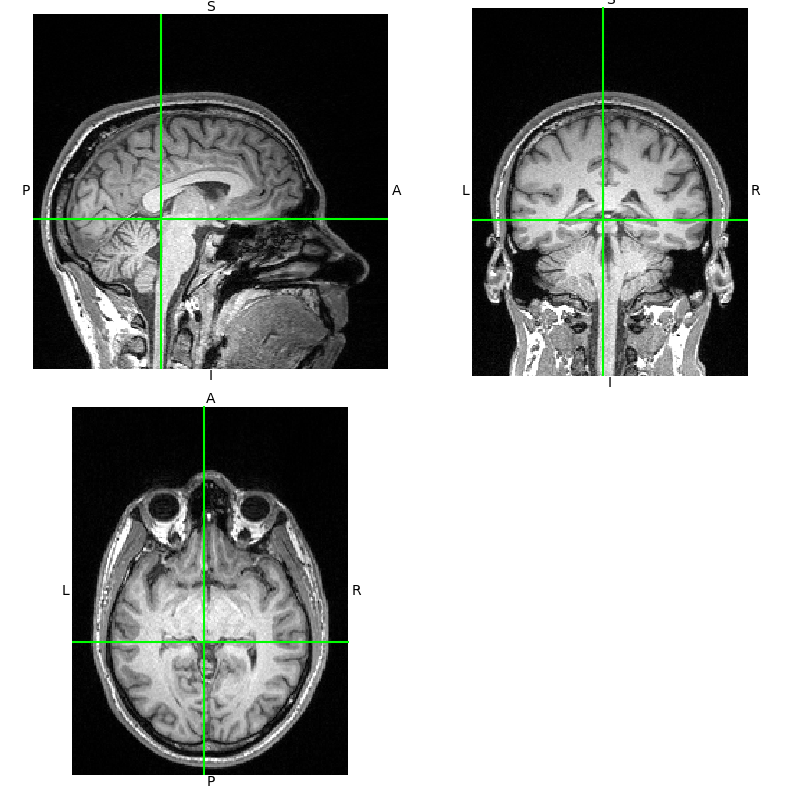

<OrthoSlicer3D: /imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-01/anat/sub-01_acq-mprage_T1w.nii.gz (192, 256, 256)>

In [96]:
%matplotlib notebook

bf.get_image().orthoview()

### `.tsv` files

In cases where a file has a `.tsv.gz` or `.tsv` extension, it will automatically be created as a `BIDSDataFile`, and we can easily grab the contents as a `DataFrame`.

Let's look at the first `events` file from our layout.

In [97]:
# Get the first events file
evfile = layout.get(suffix='events')[0]

# Get contents as a DataFrame and show the first few rows
df = evfile.get_df()
df.head()

,onset,duration,circle_duration,trial_type,trigger,button_pushed,response_time,stim_file
0,0.000,0.908,0.534,FAMOUS,5,4.0,2.158,func/f013.bmp
1,3.273,0.962,0.586,FAMOUS,6,4.0,1.233,func/f013.bmp
2,6.647,0.825,0.546,UNFAMILIAR,13,4.0,1.183,func/u014.bmp
3,9.838,0.968,0.597,UNFAMILIAR,14,4.0,0.930,func/u014.bmp
4,12.978,0.904,0.415,UNFAMILIAR,13,7.0,1.068,func/u016.bmp


Let's look at the `participants` information. 

In [98]:
participants = layout.get(suffix='participants', extension='tsv')[0]

df = participants.get_df()
df.sort_values(by=['participant_id'])

,participant_id,age,sex,group
0,sub-01,31,M,control
1,sub-04,26,F,control


### Filename parsing
Let's say you have a filename, and you want to manually extract BIDS entities from it. The `parse_file_entities` method provides the facility:

In [99]:
layout.parse_file_entities('some_path_to_bids_file/sub-04_task-facerecognition_run-01_bold.nii.gz')

{'subject': '04',
 'task': 'facerecognition',
 'run': 01,
 'suffix': 'bold',
 'extension': '.nii.gz'}

You can do the same for `BIDSFile` object that we defined earlier. 

In [100]:
layout.parse_file_entities(bf.path)

{'subject': '01',
 'acquisition': 'mprage',
 'suffix': 'T1w',
 'datatype': 'anat',
 'extension': '.nii.gz'}

In [101]:
layout.parse_file_entities(bf.filename)

{'acquisition': 'mprage', 'suffix': 'T1w', 'extension': '.nii.gz'}

### Path construction
You may want to create valid BIDS filenames for new files that would sit within your BIDS project. This is useful when you know what entity values you need to write out to, but don’t want to deal with looking up the precise BIDS file-naming syntax. All we need to do is define a dictionary with the name components, and build_path takes care of the rest (including injecting sub-directories):

In [102]:
entities = {
    'subject': '01',
    'run': '02',
    'task': 'facerecognition',
    'suffix': 'bold'
}

layout.build_path(entities)

'/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-01/func/sub-01_task-facerecognition_run-02_bold.nii.gz'

Keep in mind that `_` and `-` have special meaning in BIDS specification. E.g., you can't name your task `face-recognition`, that would not be 'spec-compliant' and would end in an error! However, if you add `validate=False`, you can get away with it (i'e', `layout.build_path(entities, validate=False)`). 

You can also use `build_path` in more sophisticated ways by defining your own set of matching templates that cover cases not supported by BIDS out of the box. For example, suppose you want to create a template for naming a new `stat` file (containig statistical results of your rMRI analysis). You could do something like:

In [103]:
# Define the pattern to build out of the components passed in the dictionary
pattern = "sub-{subject}_task-{task}_run-{run}_type-{type}_{suffix}.nii.gz"

entities = {
    'subject': '01',
    'task': 'facerecognition',
    'run': '02',
    'type': 'tval',
    'suffix': 'stat'
}

# Notice we pass the new pattern as the second argument
layout.build_path(entities, pattern, validate=False)

'/imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-01_task-facerecognition_run-02_type-tval_stat.nii.gz'

### Report generation
`PyBIDS` also allows you to automatically create data acquisition reports based on the available `image` and `meta-data` information. This enables a new level of standardisation and transparency. FAIR-ness, meta-analyses, etc. 

In [104]:
# import the BIDSReport function from the reports submodule
from bids.reports import BIDSReport

Now we only need to apply the `BIDSReport` function to our `layout` and generate our report. 

In [105]:
# Initialize a report for the dataset
report = BIDSReport(layout)

# Method generate returns a Counter of unique descriptions across subjects
try:
    descriptions = report.generate()
    pub_description = descriptions.most_common()[0][0]
    print(pub_description)
except IndexError:
    print('Sorry, it seems that the dataset is not complete and report cannot be generated.')

Number of patterns detected: 2
Remember to double-check everything and to replace <deg> with a degree symbol.
In session None, MR data were acquired using a 3-Tesla Siemens TrioTim MRI scanner.
	One run of T1-weighted SP\MP\OSP GR\IR (GR\IR) single-echo structural MRI data were collected (256 slices; repetition time, TR=2250ms; echo time, TE=2.98ms; flip angle, FA=9<deg>; field of view, FOV=192x256mm; matrix size=192x256; voxel size=1x1x1mm).
	A spoiled gradient recalled (GR) field map (phase encoding: anterior to posterior; 33 slices in interleaved ascending order; repetition time, TR=400ms; echo time 1 / 2, TE1/2=5.197.65ms; flip angle, FA=60<deg>; field of view, FOV=192x192mm; matrix size=64x64; voxel size=3x3x3.75mm) was acquired for the ninth run of the facerecognition BOLD scan.
	Nine runs of facerecognition segmented k-space echo planar (EP) single-echo fMRI data were collected (33 slices in interleaved ascending order; repetition time, TR=2000ms; echo time, TE=30ms; flip angle,

/home/da05/.conda/envs/cognestic23/lib/python3.10/site-packages/bids/reports/parsing.py:386: UserWarning: sub-01_magnitude1.nii.gz not yet supported.
  warnings.warn(group[0].filename + " not yet supported.")
/home/da05/.conda/envs/cognestic23/lib/python3.10/site-packages/bids/reports/parsing.py:386: UserWarning: sub-01_magnitude2.nii.gz not yet supported.
  warnings.warn(group[0].filename + " not yet supported.")
/home/da05/.conda/envs/cognestic23/lib/python3.10/site-packages/bids/layout/models.py:229: UserWarning: Accessing entities as attributes is deprecated as of 0.7. Please use the .entities dictionary instead (i.e., .entities['run'] instead of .run.
  warnings.warn("Accessing entities as attributes is deprecated as "
/home/da05/.conda/envs/cognestic23/lib/python3.10/site-packages/bids/reports/parsing.py:386: UserWarning: sub-04_magnitude1.nii.gz not yet supported.
  warnings.warn(group[0].filename + " not yet supported.")
/home/da05/.conda/envs/cognestic23/lib/python3.10/site-pa

**Can you spot an error in the report?**